In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
import operator

In [ ]:
from pathlib import Path
from IPython.core.debugger import set_trace
# from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

input_path = Path("data")

In [19]:
operator.add(1,2)
operator.eq(2,2)
operator.eq(2,1)
operator.eq.__name__

3

True

False

'eq'

In [20]:
def test_fnc(a,b,comp,comp_name=None):
    if not comp_name: comp_name=comp.__name__
    assert comp(a,b),f'{comp_name}\n{a}\n{b}'

In [21]:
test_fnc(1+1,2,operator.eq)

# Grab KMNIST

In [22]:
from pathlib import Path
from IPython.core.debugger import set_trace
# from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor
import numpy

In [36]:
def get_data():
    # Path to training images and corresponding labels provided as numpy arrays
    kmnist_train_images_path = input_path/"kmnist-train-imgs.npz"
    kmnist_train_labels_path = input_path/"kmnist-train-labels.npz"

    # Path to the test images and corresponding labels
    kmnist_test_images_path = input_path/"kmnist-test-imgs.npz"
    kmnist_test_labels_path = input_path/"kmnist-test-labels.npz"
    import numpy
    train = numpy.load(kmnist_train_images_path)['arr_0']
    train_labels = numpy.load(kmnist_train_labels_path)['arr_0']

    # Load the test data from the corresponding npz files
    test = numpy.load(kmnist_test_images_path)['arr_0']
    test_labels = numpy.load(kmnist_test_labels_path)['arr_0']
    x_train,y_train,x_valid,y_valid = map(tensor, (train,train_labels,test,test_labels))
    x_train = x_train.view(x_train.shape[0],-1).to(dtype=torch.float32)/255
    x_valid = x_valid.view(x_valid.shape[0],-1).to(dtype=torch.float32)/255
    
    return x_train,y_train,x_valid,y_valid

In [23]:

# Path to training images and corresponding labels provided as numpy arrays
kmnist_train_images_path = input_path/"kmnist-train-imgs.npz"
kmnist_train_labels_path = input_path/"kmnist-train-labels.npz"

# Path to the test images and corresponding labels
kmnist_test_images_path = input_path/"kmnist-test-imgs.npz"
kmnist_test_labels_path = input_path/"kmnist-test-labels.npz"

In [24]:
import numpy
train = numpy.load(kmnist_train_images_path)['arr_0']
train_labels = numpy.load(kmnist_train_labels_path)['arr_0']

# Load the test data from the corresponding npz files
test = numpy.load(kmnist_test_images_path)['arr_0']
test_labels = numpy.load(kmnist_test_labels_path)['arr_0']

In [25]:
train.shape,test.shape

((60000, 28, 28), (10000, 28, 28))

In [26]:
x_train,y_train,x_valid,y_valid = map(tensor, (train,train_labels,test,test_labels))
n,c,_ = x_train.shape
y_train.min(), y_train.max()

(tensor(0, dtype=torch.uint8), tensor(9, dtype=torch.uint8))

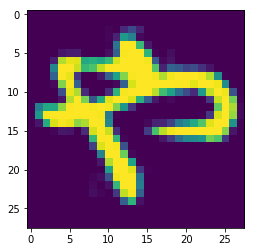

In [27]:
plt.imshow(x_train[1])

In [28]:
x_train = x_train.view(x_train.shape[0],-1)
x_valid = x_valid.view(x_valid.shape[0],-1)
x_train.shape,x_valid.shape

(torch.Size([60000, 784]), torch.Size([10000, 784]))

In [32]:
x_train,x_valid = x_train.to(dtype=torch.float64),x_valid.to(dtype=torch.float64) # for matmul

# Matmul

In [15]:
temp=torch.randn(1000)
temp.mean()
temp.std()

tensor(0.0153)

tensor(0.9679)

In [18]:
def test_near(a,b):
    test_fnc(a,b,lambda x,y: torch.allclose(x,y,rtol=1e-3,atol=1e-5))

In [31]:
# dump pythob mm

In [21]:
def matmul(a,b):
    ar,ac = a.shape # n_rows * n_cols
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): # or br
                c[i,j] += a[i,k] * b[k,j]
    return c

In [35]:
weights = torch.randn(784,10)
bias = torch.zeros(10) 

In [37]:
m1 = x_valid[:5]
m2 = weights
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [48]:
test_near(matmul(m1,m2),
          torch.mm(m1.to(dtype=torch.float32),m2))

In [49]:
%%timeit
_ = matmul(m1,m2)

585 ms ± 7.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Use broadcasting

In [72]:
def matmul_bc(m1,m2):
    m1 = m1.to(dtype=torch.float32)
    result = torch.zeros(m1.shape[0],m2.shape[1])
    for i in range(m1.shape[0]):
        m1_row = m1[i,:]
        result[i,:] = (m1_row[:,None] * m2).sum(dim=0)
    return result

In [75]:
%timeit -n 10 _=matmul_bc(m1, m2)

221 µs ± 99.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [74]:
test_near(matmul_bc(m1,m2),
          torch.mm(m1.to(dtype=torch.float32),m2))

# Forward pass

In [37]:
x_train,y_train,x_valid,y_valid = get_data()

In [38]:
x_train.mean(),x_train.std()

(tensor(0.1904), tensor(0.3475))

TODO: plot normal distribution with mean 0 and different std to get a feel of what it looks like